<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/Perceptron_Lab_5_2_020623.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.2
# *The Perceptron*

The perceptron is the basic unit of a neural network. It learns by adjusting the weights applied to each of its inputs until the error at its output is minimised.

The example in this lab uses the stochastic gradient descent (SGD) algorithm to optimise the weights of a perceptron applied to a 2D classification problem.

# Perceptron:

* Perceptron is a simple model inspired by how our brain works
* Like a computer program that learns to make decisions, just like humans learn from experiences
* First nvented in 1957 by an American psychologist named Frank Rosenblatt
* Perceptron takes in some inputs (like numbers) and makes a decision based on those inputs
* It learns by adjusting the importance it gives to each input, in a similar way humans learn to pay more attention to certain things
* People use perceptrons to solve problems like classifying things into different groups or predicting outcomes based on some inputs


# Support Vector Machine (SVM):

* Another type of model that helps with decision-making
* First developed by computer scientists Vladimir Vapnik and Alexey Chervonenkis in the 1990s
* SVM takes examples and tries to find the best way to separate them into different groups
* Similar to drawing a line or a curve on a piece of paper to separate different things
* SVM is good at finding the best separation line or curve
* Often used for tasks like classifying emails as spam or not spam, or recognizing different types of objects in images

# Using Perceptrons and SVMs:

* To use a perceptron or SVM, you need to give it some examples and let it learn from them.
* For example, if you want a perceptron to learn to tell whether a fruit is an apple or an orange, you can show it many pictures of apples and oranges and tell it which is which.
* Then, the perceptron will learn to make its own decisions based on the patterns it sees in the pictures.
* SVMs work in a similar way. You show it examples and it finds the best way to separate them into groups.
* Once the perceptron or SVM has learned, you can give it new inputs, and it will try to make a decision based on what it has learned.

# Visual Representations:

* Perceptrons and SVMs can be represented with simple visuals like graphs or diagrams.
* For a perceptron, you can imagine arrows coming in with numbers as inputs, and a decision being made at the end.
* SVMs can be represented with lines or curves that separate different groups of points on a graph.
* These visuals help us understand how the models work and how they make decisions.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

The training dataset has 2 numeric features (X is 2D) and a binary response (y = +/-1):

In [2]:
X = np.array([[-2, 4], [4, 1], [1, 6], [2, 4], [6, 2]])
y = np.array([-1, -1, 1, 1, 1])

Here is the training data, along with a candidate hyperplane that separates the classes:

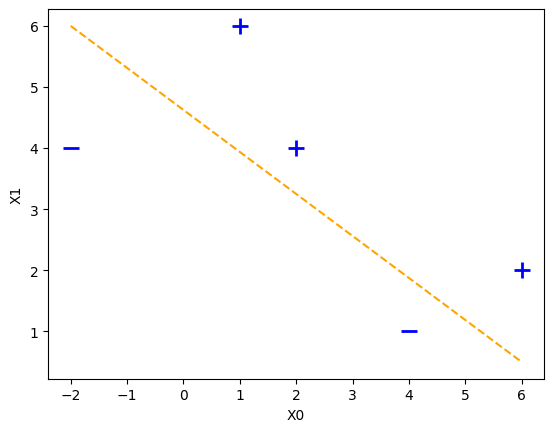

In [3]:
def plotData(X):
    for d, sample in enumerate(X):
        # Plot the negative samples
        if d < 2:
            plt.scatter(sample[0], sample[1], s = 120, marker = '_', color = 'blue', linewidths = 2)
        # Plot the positive samples
        else:
            plt.scatter(sample[0], sample[1], s = 120, marker = '+', color = 'blue', linewidths = 2)
    plt.xlabel('X0')
    plt.ylabel('X1')

plotData(X)

# Print a possible hyperplane, that is separating the two classes:
plt.plot([-2, 6], [6, 0.5], color = 'orange', linestyle = 'dashed')

We need to include a bias term (-1) in the X array. This will transform the decision boundary so that the sign of the dot product of any data point with the weights vector, represented in the code below by $$⟨x[i], w⟩ = {\rm wt}[0]\times x_0 + {\rm wt}[1]\times x_1 + {\rm wt}[2]\times(-1),$$  will determine class membership:

In [4]:
X = np.array([ [-2, 4, -1], [4, 1, -1], [1, 6, -1], [2, 4, -1], [6, 2, -1]])

Here is a simple implementation of the stochastic gradient descent algorithm for computing the weights:

In [5]:
def perceptron_sgd(Xt, Yt, eta = 1, epochs = 20):

    # Initialize the weight vector for the perceptron with zeros:
    wt = np.zeros(len(Xt[0]))

    for t in range(epochs):

        # Iterate over each sample in the data set:
        for i, x in enumerate(Xt):

            # Test for misclassification: y * ⟨x[i], w⟩ <= 0:
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:

                # Update weights:
                wt = wt + eta * Xt[i] * Yt[i]

    return wt

Compute the weights using default learning rate (eta = 1) and number of epochs = 10:

In [6]:
w = perceptron_sgd(X, y, epochs = 10)
print(w)

[3. 4. 9.]


Did it work? Let's check the decision boundary (hyperplane) and try some predictions:

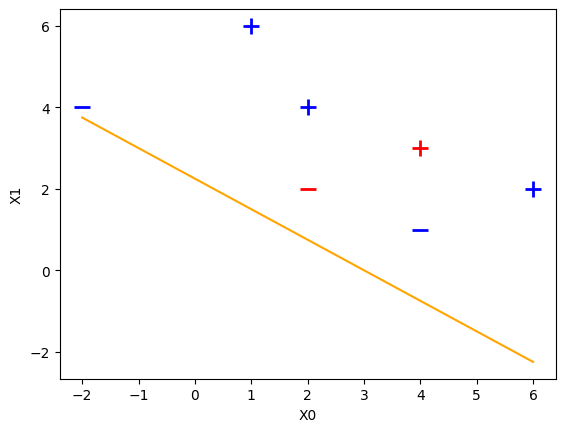

In [7]:
def plotHyperplane(wt):

    xx = np.linspace(-2,6)
    yy = (-wt[0]*xx + wt[2])/wt[1]
    plt.plot(xx, yy, color='orange')

plotData(X)
plotHyperplane(w)

# Test samples:
plt.scatter(2, 2, s = 120, marker = '_', linewidths = 2, color = 'red')
plt.scatter(4, 3, s = 120, marker = '+', linewidths = 2, color = 'red')

So far, all of the negatively labelled points are misclassified!

Let's a look at how the model training actually proceeds. The error at each epoch is calculated using a hinge-loss function:

[3. 4. 9.]


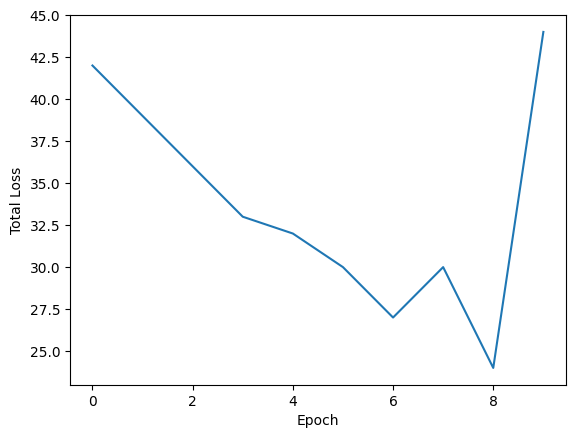

In [8]:
def perceptron_sgd_plot(Xt, Yt, eta = 1, epochs = 10):

    wt = np.zeros(len(Xt[0]))
    errors = []

    for t in range(epochs):
        total_error = 0
        for i, x in enumerate(Xt):
            if (np.dot(Xt[i], wt) * Yt[i]) <= 0:
                total_error += (np.dot(Xt[i], wt) * Yt[i])
                wt += eta * Xt[i] * Yt[i]
        errors.append(total_error * (-1))

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return wt

print(perceptron_sgd_plot(X, y))

So, 10 epochs clearly wasn't enough for the SGD algorithm to converge.

Try a increasing `epochs` until the error goes to zero, then replot the test data and decision boundary:

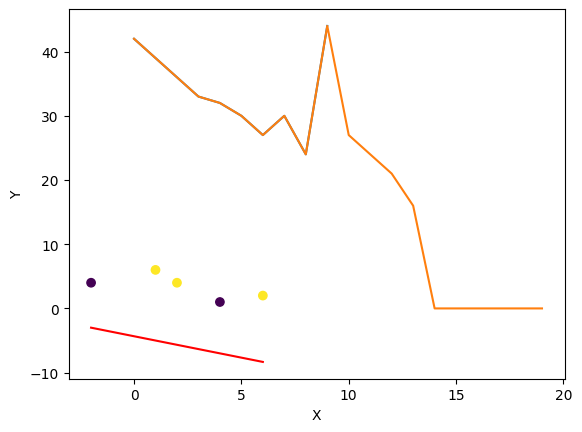

In [9]:
#?
# Define the number of epochs to start with
epochs = 10

# Train the perceptron model with increasing epochs until error goes to zero
while True:
    weights = perceptron_sgd_plot(X, y, epochs=epochs)
    if np.sum(np.dot(X, weights) * y <= 0) == 0:
        break
    epochs += 10

# Plot the test data and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y)
x_boundary = np.linspace(np.min(X[:, 0]), np.max(X[:, 0]), 100)
y_boundary = (-weights[0] * x_boundary - weights[2]) / weights[1]
plt.plot(x_boundary, y_boundary, color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


In [ ]:
#?


Show how to manually compute class membership for a new data point Xi = [3.5, 3.3] using just the weights determined above:

In [10]:
#?
import numpy as np

# Assuming weights from the perceptron model
weights = np.array([0.3, 0.5, -0.1])

# New data point
Xi = np.array([3.5, 3.3])

# Add bias term
Xi = np.append(Xi, 1)

# Compute dot product
dot_product = np.dot(Xi, weights)

# Determine class membership
if dot_product >= 0:
    class_membership = 1
else:
    class_membership = -1

print("Class Membership:", class_membership)


Class Membership: 1


In a similar manner make sure each of the training data points is correctly classified:

In [11]:
#?

import numpy as np

# Assuming weights from the perceptron model
weights = np.array([0.3, 0.5, -0.1])

# Training data points (X) and their corresponding labels (y)
X = np.array([[2.5, 2.7], [1.8, 1.9], [3.2, 3.1]])
y = np.array([1, -1, 1])

# Add bias term to the training data points
X = np.column_stack((X, np.ones(len(X))))

# Check classification of each training data point
for i in range(len(X)):
    dot_product = np.dot(X[i], weights)
    predicted_label = 1 if dot_product >= 0 else -1
    print("Data Point:", X[i])
    print("Predicted Label:", predicted_label)
    print("Actual Label:", y[i])
    print("Correctly Classified:", predicted_label == y[i])
    print()


Data Point: [2.5 2.7 1. ]
Predicted Label: 1
Actual Label: 1
Correctly Classified: True

Data Point: [1.8 1.9 1. ]
Predicted Label: 1
Actual Label: -1
Correctly Classified: False

Data Point: [3.2 3.1 1. ]
Predicted Label: 1
Actual Label: 1
Correctly Classified: True



## === End ===



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



